In [2]:
import numpy as np #linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

Data processing!

In [6]:
df = pd.read_csv('Social Network Ads.csv')
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
153,36,50000,0
152,31,76000,0
103,33,149000,1
230,35,147000,1
370,60,46000,1


Train Test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard scaler
after scaling, the two quantities are comaprable.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to the train set, it will learn the parameters.
# you don't fit the data on the testing data
scaler.fit(X_train)

# transform train and test sets
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [14]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [20]:
# since this returns a numpy array and i want to convert into a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=X_test.columns)

In [21]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

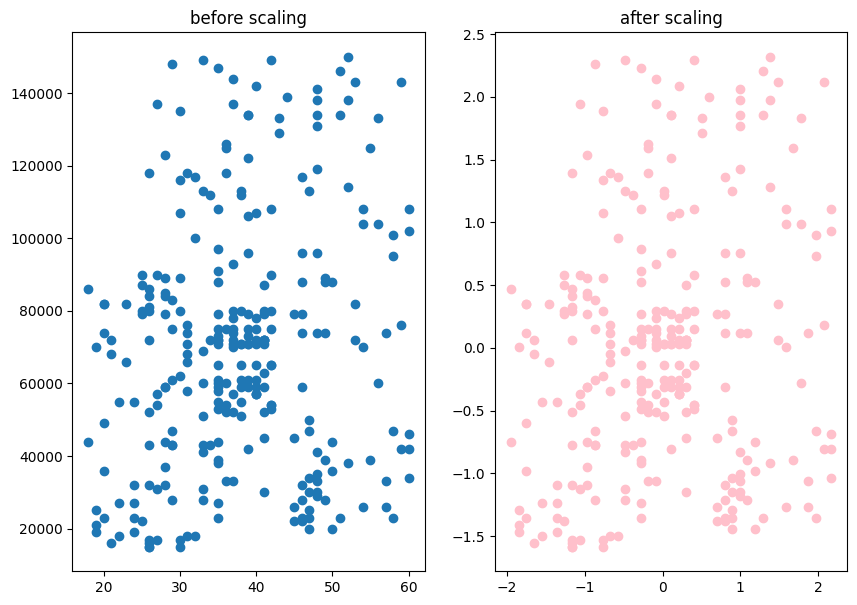

In [31]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize = (10,7))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='pink')
ax2.set_title("after scaling")
plt.show()

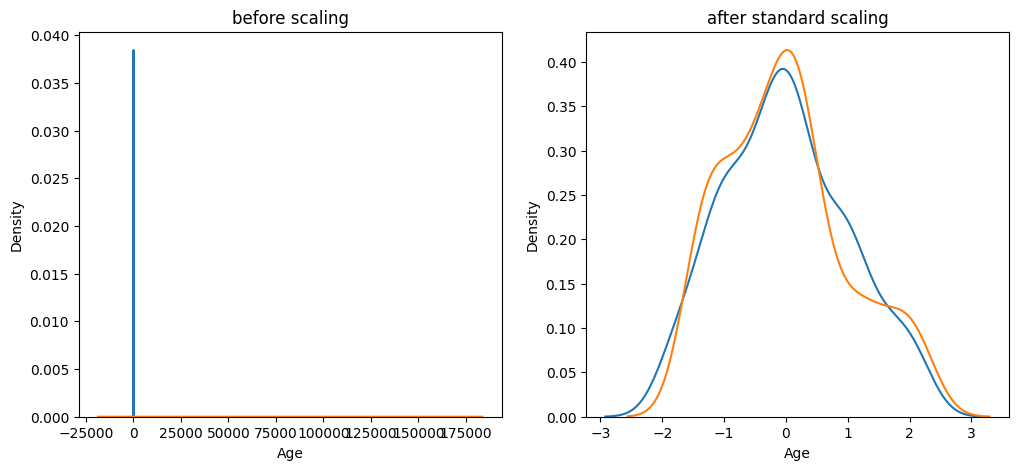

In [32]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title("after standard scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

Comparision of distributions


<Axes: title={'center': 'age distrbution after scaling'}, xlabel='Age', ylabel='Density'>

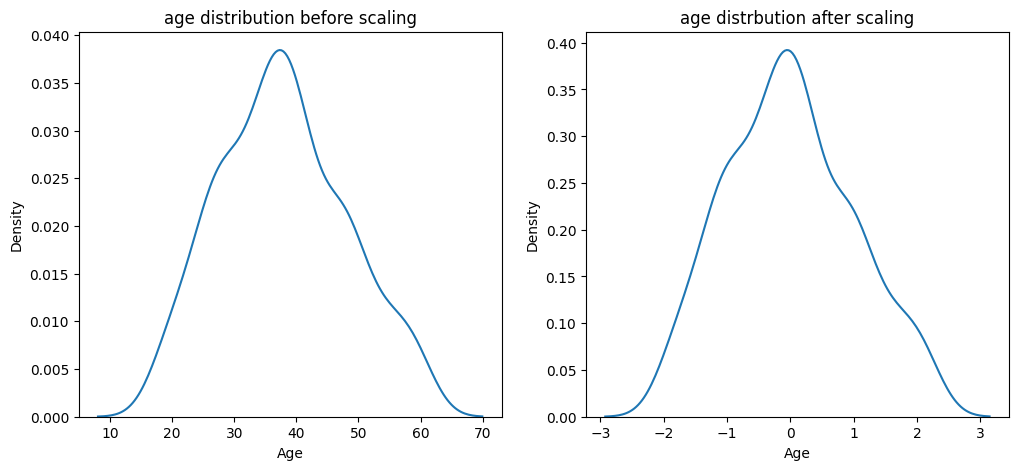

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title("age distribution before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling
ax2.set_title("age distrbution after scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

Why scaling is important?

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [37]:
lr.fit(X_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


scaling is quite important for algorthims.They straight up improve the accuracy score. However this is not true for all the algos

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [41]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


# Effect of outlier
well, outliers still remain even when you end up scaling the data

In [47]:
# adding outliers
df = pd.concat([df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,300000],'Purchased':[0,1,1]})],ignore_index=True)

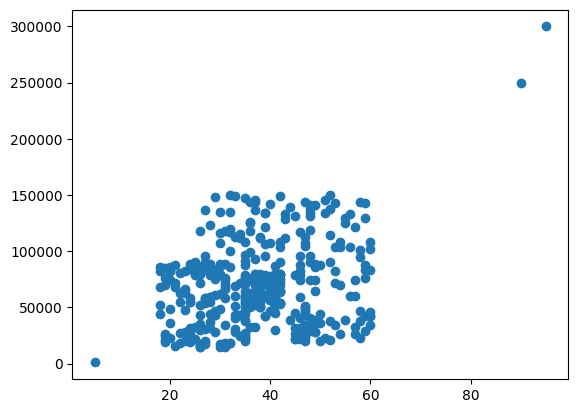

In [49]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting
scaler.fit(X_train)
#transform the train and test scales
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)
x_train_scaled = pd.DataFrame(x_train_scaled,columns=X_train.columns)
x_test_scaled= pd.DataFrame(x_test_scaled,columns=X_test.columns)


Text(0.5, 1.0, 'after scaling')

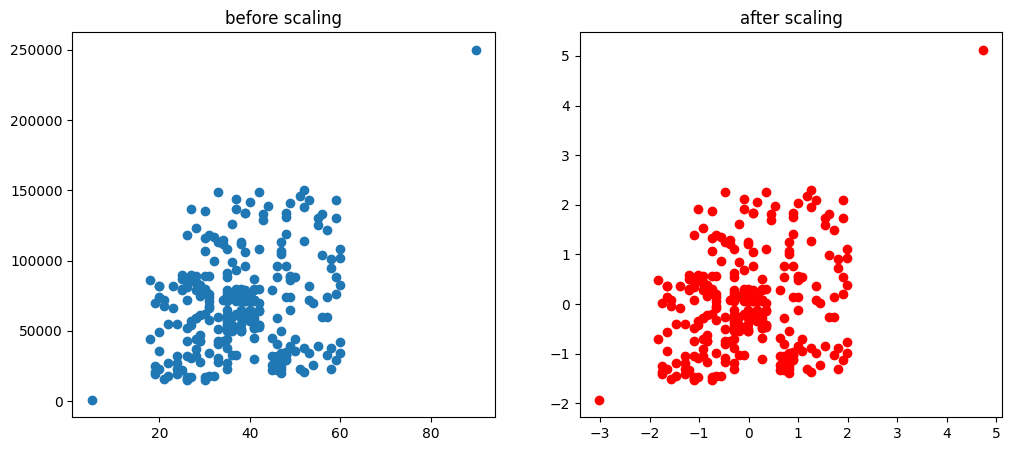

In [55]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("after scaling")